# Machine Learning in Fintech


### Area of Fintech

Credit Card Fraud


### Dataset Researched and Located

 We get the data from the [Kaggle website](https://https://www.kaggle.com/subhajournal/credit-card-fraud-dataset)


### ML Use Case

We can train ML models on a set of dataset including credit card transaction information as well as card and demographic information of the owner of the account.

### ML Model Selected

logistic regression

**Group Number**: 02

**Group Name**: ATK

**Group Members**:

- Amal Alshathri

- Areej Alsrhan

- Kholoud Alhamdan

- Turki AlAnzi

- Abdullah Alzahrani 

- Thamer Abanmi

 
# **1. import the packages**

In [1]:
import pandas
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.features import PCA
from sklearn.decomposition import PCA as PCA_s
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from yellowbrick.features import ParallelCoordinates

from yellowbrick.classifier import ROCAUC


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.7.0


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# **2. Read the data**

In [4]:
df = pd.read_csv('Credit_Card_Fraud1.csv')
df

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit_usage,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
current_balance,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
location,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
cc_age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


# **3. Clean The Data**

In [6]:
df.employment.unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

### **3.1 replace the non-numerical number to number**

In [7]:
df.employment.replace({'>=7':7,'1<=X<4':2,'4<=X<7':5,'unemployed':0,'<1':1},inplace=True)

In [8]:
df.personal_status.unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

Identify The Data

In [9]:
y = df['class']=='bad'
y.mean()

0.3

In [10]:
df.columns.sort_values().values

array(['Average_Credit_Balance', 'cc_age', 'class', 'credit_history',
       'credit_usage', 'current_balance', 'employment',
       'existing_credits', 'foreign_worker', 'housing', 'job', 'location',
       'num_dependents', 'other_parties', 'other_payment_plans',
       'over_draft', 'own_telephone', 'personal_status',
       'property_magnitude', 'purpose', 'residence_since'], dtype=object)

# **4. Identify nominal categorical labels**

In [11]:

df2= pd.get_dummies(df,columns=['credit_history','purpose','personal_status','job'])
df2

,over_draft,credit_usage,current_balance,Average_Credit_Balance,employment,location,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,num_dependents,own_telephone,foreign_worker,class,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,<0,6,1169,no known savings,7,4,none,4,real estate,67,none,own,2,1,yes,yes,good,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0<=X<200,48,5951,<100,2,2,none,2,real estate,22,none,own,1,1,none,yes,bad,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,no checking,12,2096,<100,5,2,none,3,real estate,49,none,own,1,2,none,yes,good,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,<0,42,7882,<100,5,2,guarantor,4,life insurance,45,none,for free,1,2,none,yes,good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,<0,24,4870,<100,2,3,none,4,no known property,53,none,for free,2,2,none,yes,bad,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,1736,<100,5,3,none,4,real estate,31,none,own,1,1,none,yes,good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
996,<0,30,3857,<100,2,4,none,4,life insurance,40,none,own,1,1,yes,yes,good,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
997,no checking,12,804,<100,7,4,none,4,car,38,none,own,1,1,none,yes,good,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
998,<0,45,1845,<100,2,4,none,4,no known property,23,none,for free,1,1,yes,yes,bad,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


# **5. Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

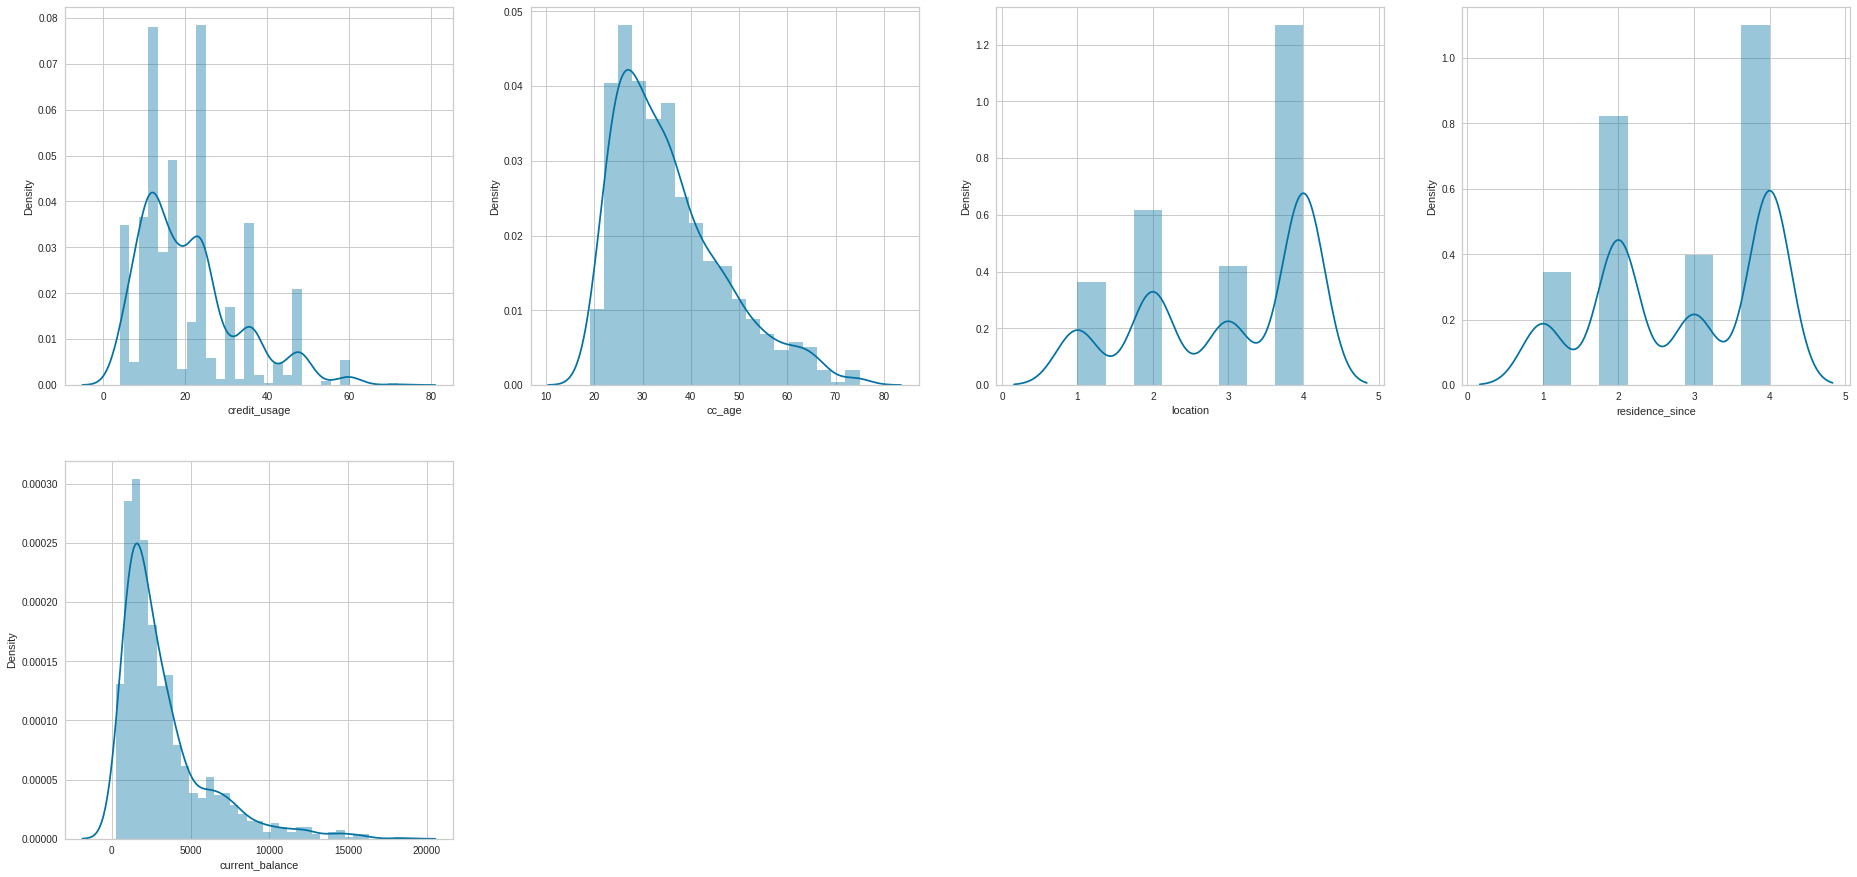

In [12]:
visualizer_cols = ['credit_usage','cc_age','location','residence_since','current_balance']

plt.figure(figsize=(32,32))

for i in range(len(visualizer_cols)):
  plt.subplot(4,4,i+1)
  sns.distplot(df[visualizer_cols[i]])
plt.show()

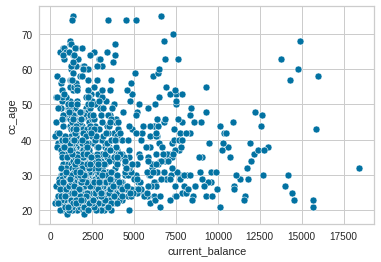

In [13]:
tdf = df.copy()
tdf['F']=y
sns.scatterplot(x = df["current_balance"],y = df["cc_age"])

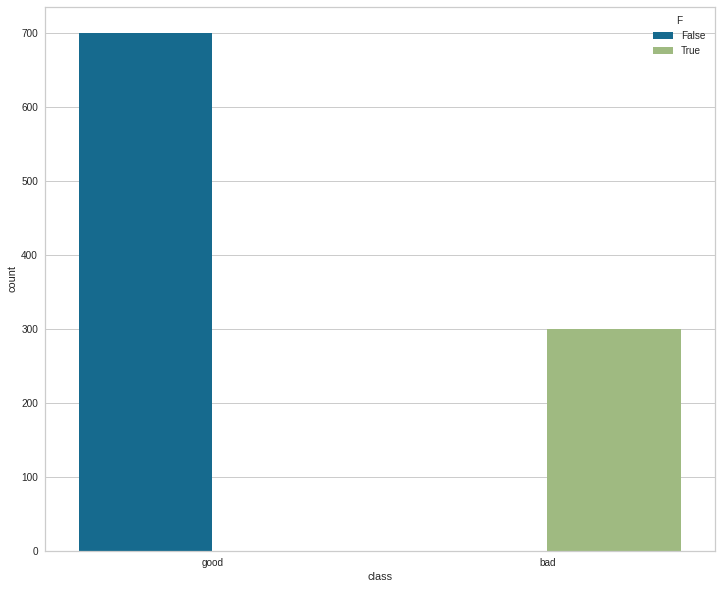

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(x='class',hue='F',data=tdf)
plt.show()

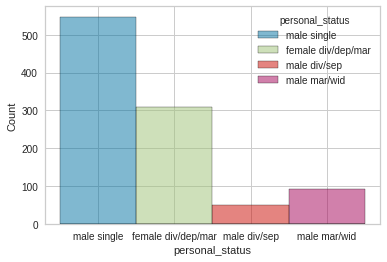

In [15]:
sns.histplot(x="personal_status",hue ='personal_status',data =df)

In [16]:
fraud_ex_df = tdf[tdf['F']==True]

In [17]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

In [18]:
X = df
classes = ['Regular', 'Fraud']

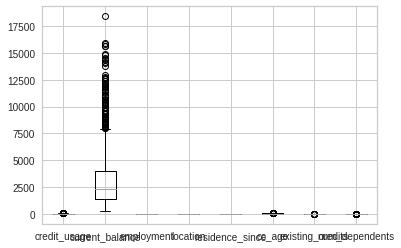

In [19]:
X.boxplot()

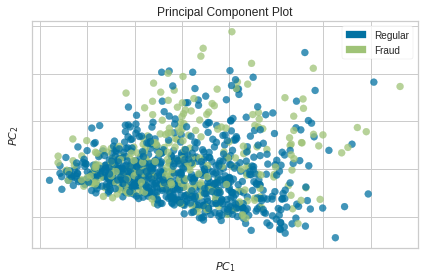

In [20]:
X[X.columns] = X[X.columns].apply(pd.to_numeric, errors='coerce')
X.dropna(axis=1,inplace=True)
visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y.values+1-1)
visualizer.show()

In [21]:
#y.values

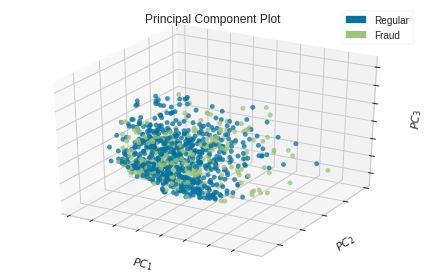

In [22]:
X[X.columns] = X[X.columns].apply(pd.to_numeric, errors='coerce')
X.dropna(axis=1,inplace=True)
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y.values+1-1)
visualizer.show()

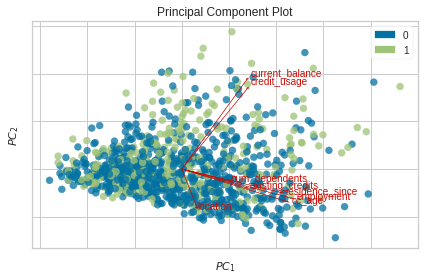

In [23]:
X[X.columns] = X[X.columns].apply(pd.to_numeric, errors='coerce')
X.dropna(axis=1,inplace=True)
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y.values+1-1)
visualizer.show()

# **6. Data splitting :**

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# **7. Build Model**

### Logistic Regression model 

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [27]:

logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:

pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,credit_usage,[0.023428838479036724]
1,current_balance,[2.5099489124922878e-05]
2,employment,[-0.12828843428678255]
3,location,[0.12253802272085308]
4,residence_since,[-0.008086535693977177]
5,cc_age,[-0.016685541994630716]
6,existing_credits,[-0.30645346077306396]
7,num_dependents,[-0.09575476754530993]


In [29]:
probabilities = logistic.predict_proba(X_test)
predictions = logistic.predict(X_test)


In [30]:
sklearn.metrics.confusion_matrix(y_pred=predictions,y_true=y_test)


array([[203,   6],
       [ 84,   7]])

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.71      0.97      0.82       209
        True       0.54      0.08      0.13        91

    accuracy                           0.70       300
   macro avg       0.62      0.52      0.48       300
weighted avg       0.66      0.70      0.61       300



In [32]:
logistic.score(X_test,y_test)

0.7

In [33]:
cross_val = cross_val_score(LogisticRegression(),X=X,y=y,cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
cross_val

array([0.7005988 , 0.71171171, 0.7027027 ])